In [40]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading the Data
dataset = pd.read_csv('C:\\Users\\Parul\\Desktop\\DATASETS\\salary_data.csv')
print(dataset.shape)
dataset.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


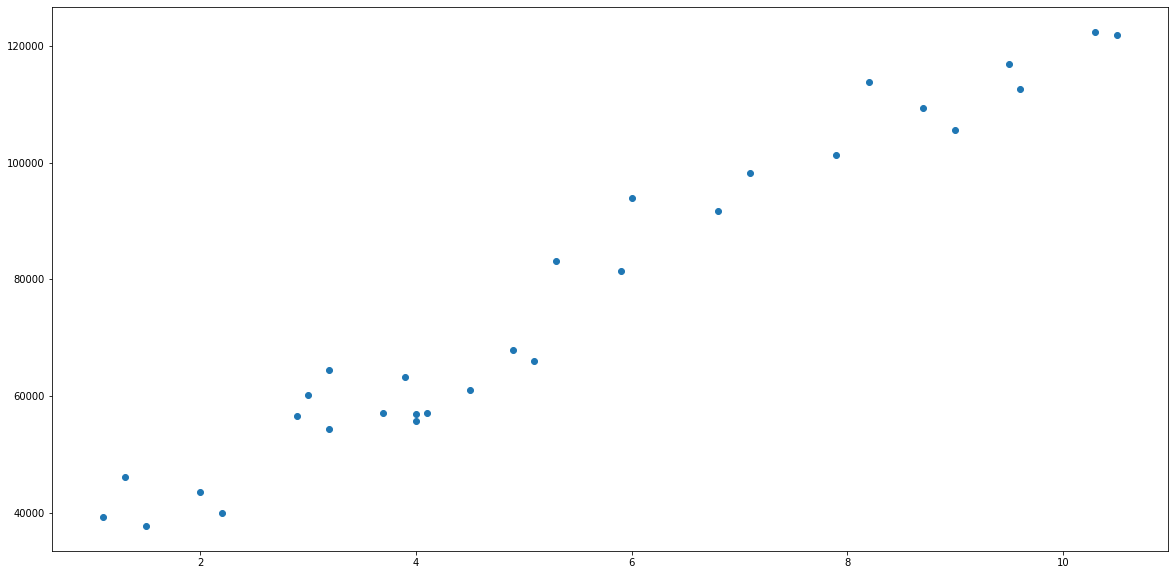

In [41]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])

In [42]:
np.corrcoef(dataset['YearsExperience'],dataset['Salary'])[0,1]

0.9782416184887599

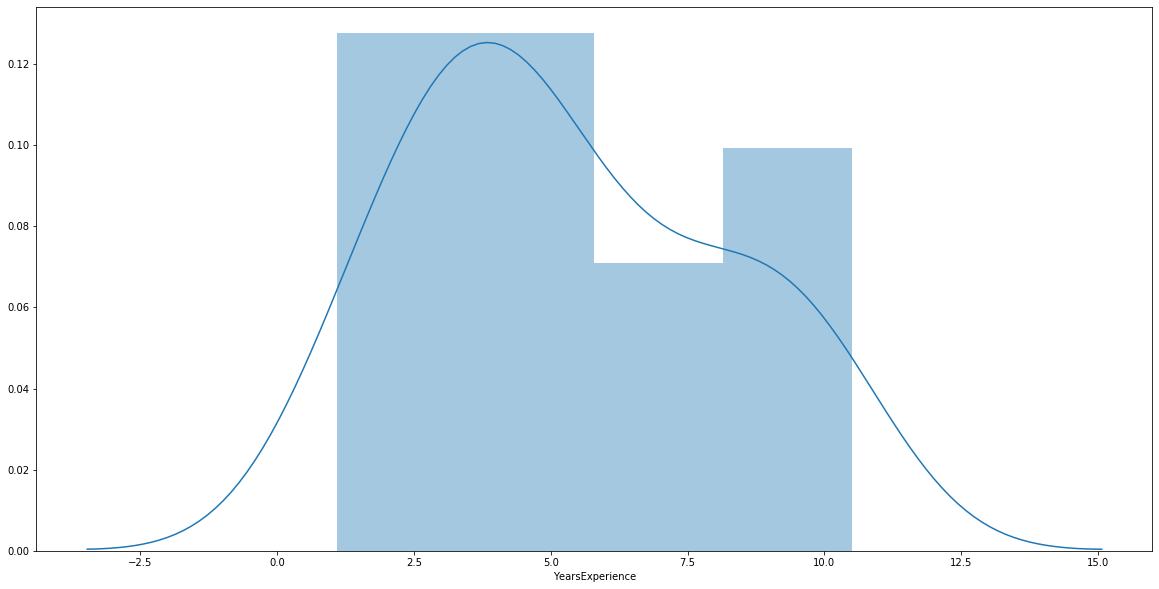

In [43]:
#Distribution plot to see the independent variables
sb.distplot(dataset['YearsExperience'])

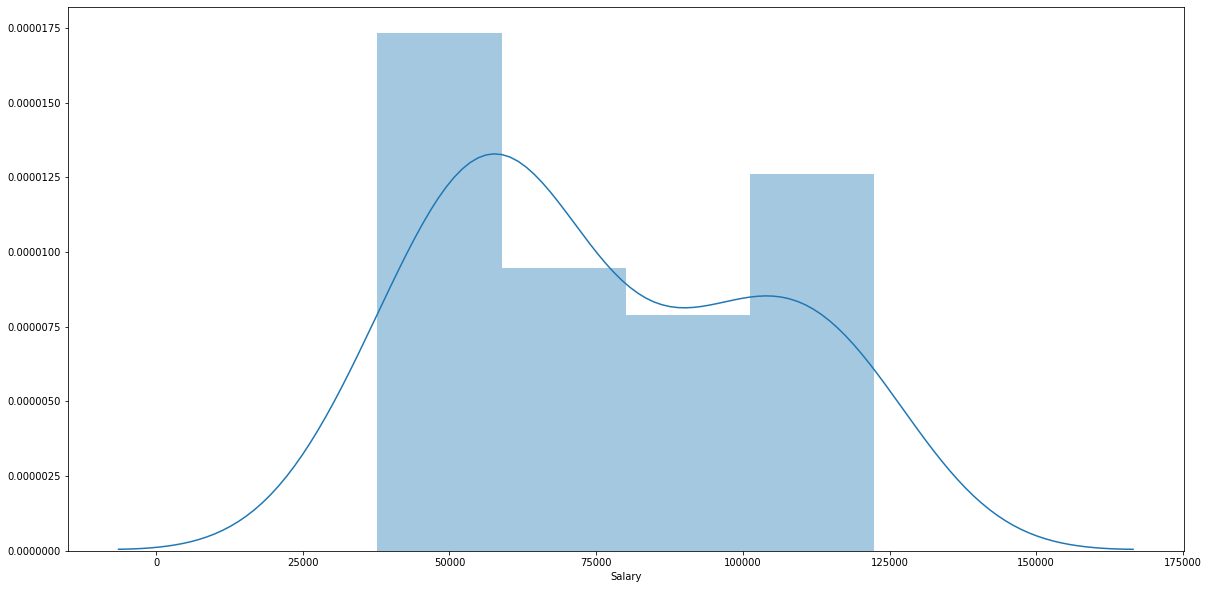

In [44]:
sb.distplot(dataset['Salary'])

In [45]:
dataset['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

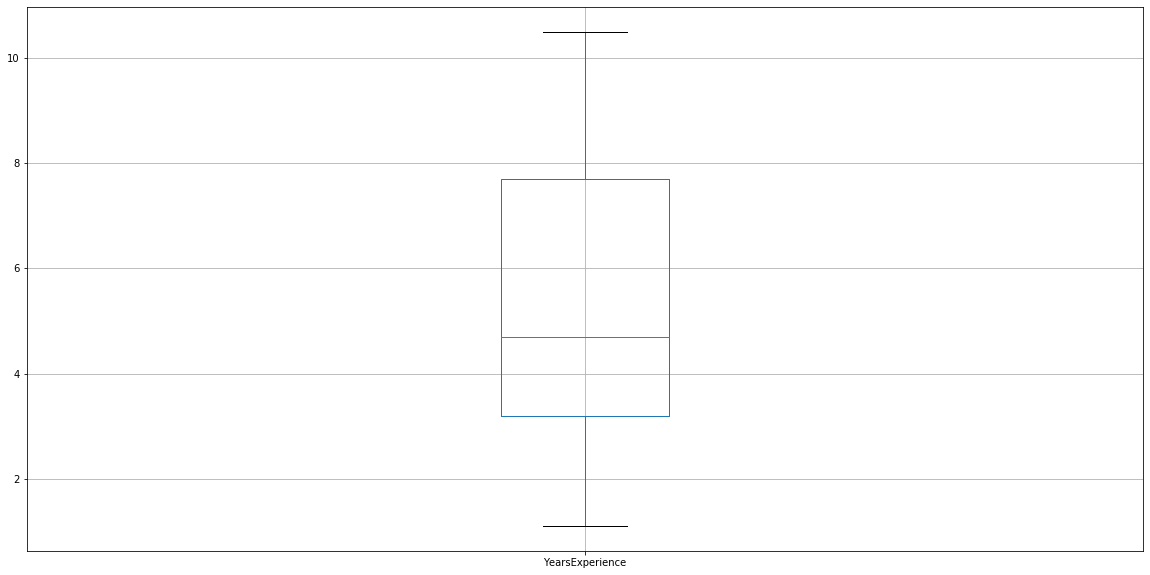

In [46]:
# To check the outlier if any
dataset.boxplot(column='YearsExperience')

In [47]:
#Using simple linear regression
#FINDING THE RELATION BETWEEN THE HEAD SIZE AND BRAIN WEIGHTS
x = dataset['YearsExperience'].values
y = dataset['Salary'].values

In [48]:
# Mean X and Y
mean_x = np.mean(x)
mean_y = np.mean(y)

In [49]:
# Total number of values
m = len(x)

In [50]:
# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):# i in range for total no. of records(m)
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

 #Print coefficients(slope and intercepts)
print(b1, b0)

9449.962321455077 25792.20019866869


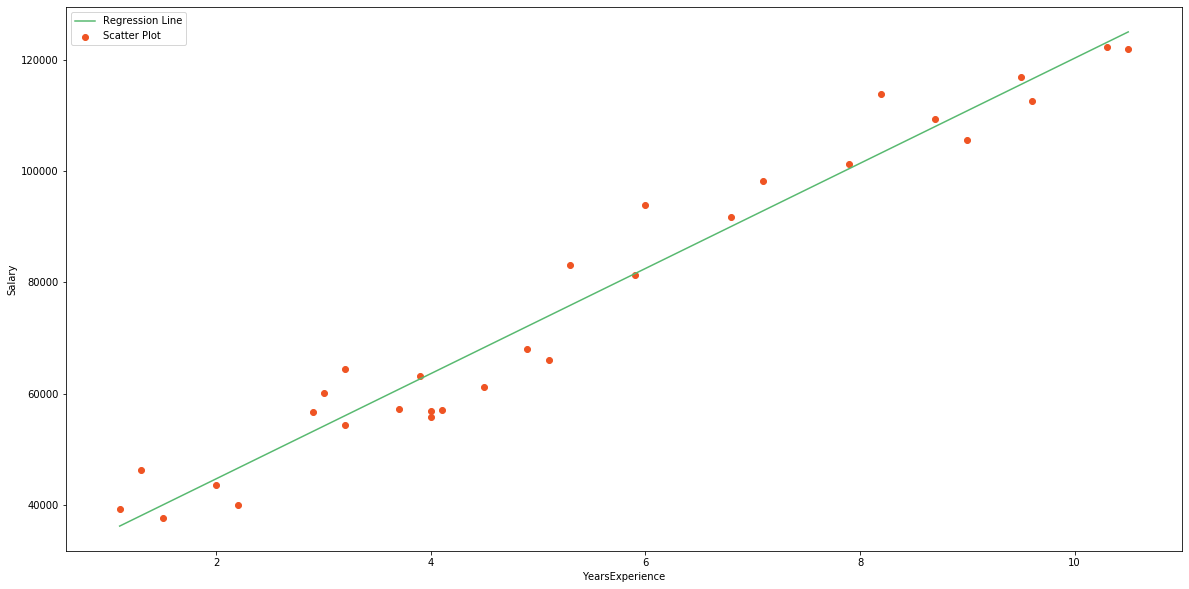

In [51]:
# y prediction with b0 and b1
y_pred = b0 +b1 * x

# Plotting Line ( best fit line or regression line)
plt.plot(x, y_pred, color='#58b970', label='Regression Line')

#Plotting Scatter Points
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [52]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * x[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

5592.043608760662


In [54]:
ss_t = 0 #total sum of square
ss_r = 0 #total sum of square of residuals
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

[0.95695666]


### USING MACHINE LEARNING

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
# Cannot use Rank 1 matrix in scikit learn
X= x.reshape((m, 1))

In [57]:
#Creating Model
reg = LinearRegression()

In [62]:
#Fitting training data
reg = reg.fit(X, y)

In [63]:
#Y Prediction
y_pred = reg.predict(X)

In [65]:
#Calculating RMSE and R2 Score
mse = mean_squared_error(y, y_pred)
rmse =np.sqrt(mse)
r2_score = reg.score(X, y)

In [66]:
print(np.sqrt(mse))
print(r2_score)

5592.043608760662
0.9569566641435084
